In [3]:
#import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#Create random lats and lngs combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs


In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)


622

In [8]:
#import the requests library
import requests

#import the Api key
from config import weather_api_key

In [9]:
#starting URL for weather map api call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" +weather_api_key

In [10]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | krasnogorskoye
Processing Record 2 of Set 1 | cayenne
Processing Record 3 of Set 1 | westport
Processing Record 4 of Set 1 | hermanus
Processing Record 5 of Set 1 | tual
Processing Record 6 of Set 1 | puerto ayora
Processing Record 7 of Set 1 | hilo
Processing Record 8 of Set 1 | mataura
Processing Record 9 of Set 1 | bulancak
Processing Record 10 of Set 1 | qaanaaq
Processing Record 11 of Set 1 | yarmouth
Processing Record 12 of Set 1 | isangel
Processing Record 13 of Set 1 | jamestown
Processing Record 14 of Set 1 | malanville
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | wageningen
Processing Record 17 of Set 1 | bathsheba
Processing Record 18 of Set 1 | san carlos de bariloche
Processing Record 19 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 20 of Set 1 | san policarpo
Processing Record 21 of Set 1 | talakan
Processing Record 22 of Set 1 | qua

Processing Record 36 of Set 4 | geraldton
Processing Record 37 of Set 4 | viransehir
Processing Record 38 of Set 4 | delijan
Processing Record 39 of Set 4 | mrirt
City not found. Skipping...
Processing Record 40 of Set 4 | porangatu
Processing Record 41 of Set 4 | mar del plata
Processing Record 42 of Set 4 | llano de piedra
Processing Record 43 of Set 4 | nuuk
Processing Record 44 of Set 4 | antropovo
Processing Record 45 of Set 4 | new norfolk
Processing Record 46 of Set 4 | sao joao da barra
Processing Record 47 of Set 4 | ponta do sol
Processing Record 48 of Set 4 | amderma
City not found. Skipping...
Processing Record 49 of Set 4 | san andres
Processing Record 50 of Set 4 | caucaia
Processing Record 1 of Set 5 | tabou
Processing Record 2 of Set 5 | pitimbu
Processing Record 3 of Set 5 | yulara
Processing Record 4 of Set 5 | sentyabrskiy
City not found. Skipping...
Processing Record 5 of Set 5 | rio gallegos
Processing Record 6 of Set 5 | currais novos
Processing Record 7 of Set 5 

Processing Record 28 of Set 8 | grindavik
Processing Record 29 of Set 8 | paucartambo
City not found. Skipping...
Processing Record 30 of Set 8 | yar-sale
Processing Record 31 of Set 8 | richards bay
Processing Record 32 of Set 8 | puri
Processing Record 33 of Set 8 | beidao
Processing Record 34 of Set 8 | cangzhou
Processing Record 35 of Set 8 | riyadh
Processing Record 36 of Set 8 | te anau
Processing Record 37 of Set 8 | cherskiy
Processing Record 38 of Set 8 | blythe
Processing Record 39 of Set 8 | urengoy
Processing Record 40 of Set 8 | oussouye
Processing Record 41 of Set 8 | oistins
Processing Record 42 of Set 8 | podor
Processing Record 43 of Set 8 | muros
Processing Record 44 of Set 8 | baker city
Processing Record 45 of Set 8 | robertsport
Processing Record 46 of Set 8 | olafsvik
Processing Record 47 of Set 8 | lata
Processing Record 48 of Set 8 | peterhead
Processing Record 49 of Set 8 | ganzhou
Processing Record 50 of Set 8 | deer lake
Processing Record 1 of Set 9 | okha
Pr

Processing Record 15 of Set 12 | nantucket
Processing Record 16 of Set 12 | maumere
Processing Record 17 of Set 12 | tucumcari
Processing Record 18 of Set 12 | saint anthony
Processing Record 19 of Set 12 | luz
Processing Record 20 of Set 12 | denpasar
Processing Record 21 of Set 12 | inhambane
Processing Record 22 of Set 12 | axim
Processing Record 23 of Set 12 | yerbogachen
Processing Record 24 of Set 12 | alenquer
Processing Record 25 of Set 12 | kavaratti
Processing Record 26 of Set 12 | simpang
Processing Record 27 of Set 12 | qaqortoq
Processing Record 28 of Set 12 | port moresby
Processing Record 29 of Set 12 | dunedin
Processing Record 30 of Set 12 | khasan
Processing Record 31 of Set 12 | elat
Processing Record 32 of Set 12 | dalnerechensk
Processing Record 33 of Set 12 | ust-ishim
Processing Record 34 of Set 12 | nouadhibou
Processing Record 35 of Set 12 | inderborskiy
City not found. Skipping...
Processing Record 36 of Set 12 | bandarbeyla
Processing Record 37 of Set 12 | ba

In [16]:
len(city_data)

571

In [17]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Krasnogorskoye,52.2953,86.1979,1.08,97,100,1.74,RU,2022-01-24 02:09:54
1,Cayenne,4.9333,-52.3333,78.10,88,75,1.01,GF,2022-01-24 02:09:55
2,Westport,41.1415,-73.3579,32.81,87,100,5.01,US,2022-01-24 02:08:39
3,Hermanus,-34.4187,19.2345,67.89,91,98,6.31,ZA,2022-01-24 02:09:55
4,Tual,-5.6667,132.7500,83.28,78,97,12.48,ID,2022-01-24 02:09:55
5,Puerto Ayora,-0.7393,-90.3518,73.83,89,91,8.81,EC,2022-01-24 02:09:56
6,Hilo,19.7297,-155.0900,77.25,81,0,1.99,US,2022-01-24 02:05:58
7,Mataura,-46.1927,168.8643,64.47,34,5,2.77,NZ,2022-01-24 02:09:56
8,Bulancak,40.9372,38.2291,37.22,81,75,11.50,TR,2022-01-24 02:09:57
9,Qaanaaq,77.4840,-69.3632,-4.11,77,100,4.38,GL,2022-01-24 02:09:57


In [18]:
new_city_data = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
new_city_data_df = city_data_df[new_city_data]
new_city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Krasnogorskoye,RU,2022-01-24 02:09:54,52.2953,86.1979,1.08,97,100,1.74
1,Cayenne,GF,2022-01-24 02:09:55,4.9333,-52.3333,78.10,88,75,1.01
2,Westport,US,2022-01-24 02:08:39,41.1415,-73.3579,32.81,87,100,5.01
3,Hermanus,ZA,2022-01-24 02:09:55,-34.4187,19.2345,67.89,91,98,6.31
4,Tual,ID,2022-01-24 02:09:55,-5.6667,132.7500,83.28,78,97,12.48
...,...,...,...,...,...,...,...,...,...
566,Farafangana,MG,2022-01-24 02:27:17,-22.8167,47.8333,76.55,89,90,18.79
567,Taoudenni,ML,2022-01-24 02:27:17,22.6783,-3.9836,63.64,19,100,9.64
568,Beyneu,KZ,2022-01-24 02:27:18,45.3167,55.2000,27.14,86,100,15.17
569,Boguchany,RU,2022-01-24 02:27:18,58.3814,97.4531,-5.22,100,98,1.66


In [20]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [21]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

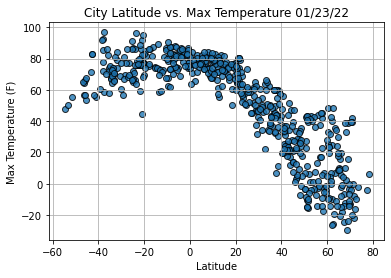

In [22]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

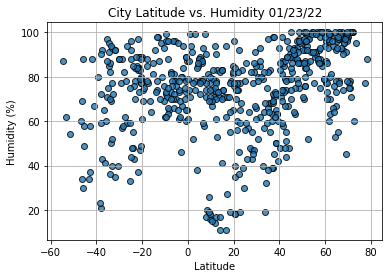

In [23]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

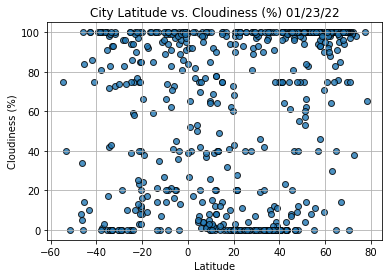

In [24]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

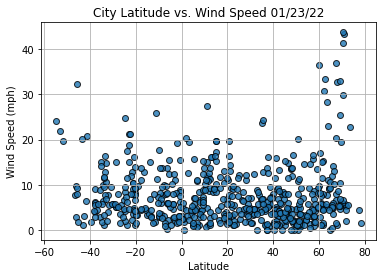

In [25]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()
